# Backeting Investment Strategies

### Importing the Data

In [32]:
import pandas as pd

In [33]:
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3333 non-null   object 
 1   Open       3333 non-null   float64
 2   High       3333 non-null   float64
 3   Low        3333 non-null   float64
 4   Close      3333 non-null   float64
 5   Adj Close  3333 non-null   float64
 6   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [34]:
data = pd.read_csv("dji.csv", parse_dates=["Date"], index_col="Date")

In [35]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


In [37]:
df = data.loc["2010-01-01":"2020-03-31", "Close"].to_frame()

In [38]:
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2020-03-24,20704.910156
2020-03-25,21200.550781
2020-03-26,22552.169922


### Data Visualisation & Returns

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

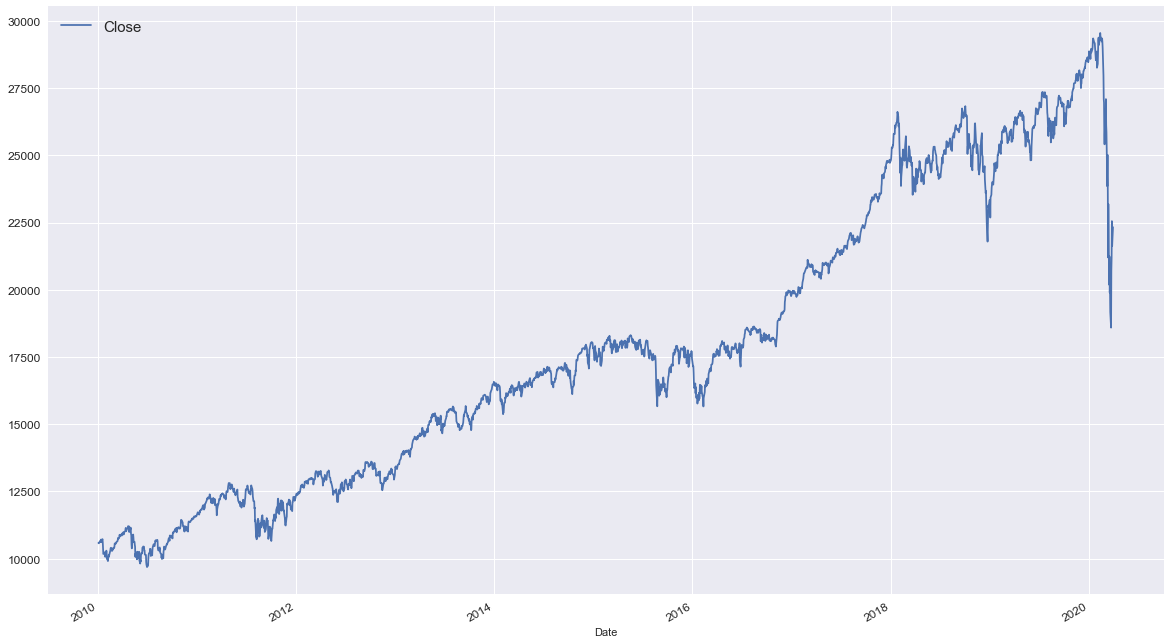

In [40]:
df.plot(figsize=(20,12), fontsize=12)
plt.legend(fontsize=15)
plt.show()

In [41]:
df["Return"] = df.pct_change()

In [42]:
df

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [43]:
df.dropna(inplace=True)

In [44]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [45]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


<AxesSubplot:xlabel='Date'>

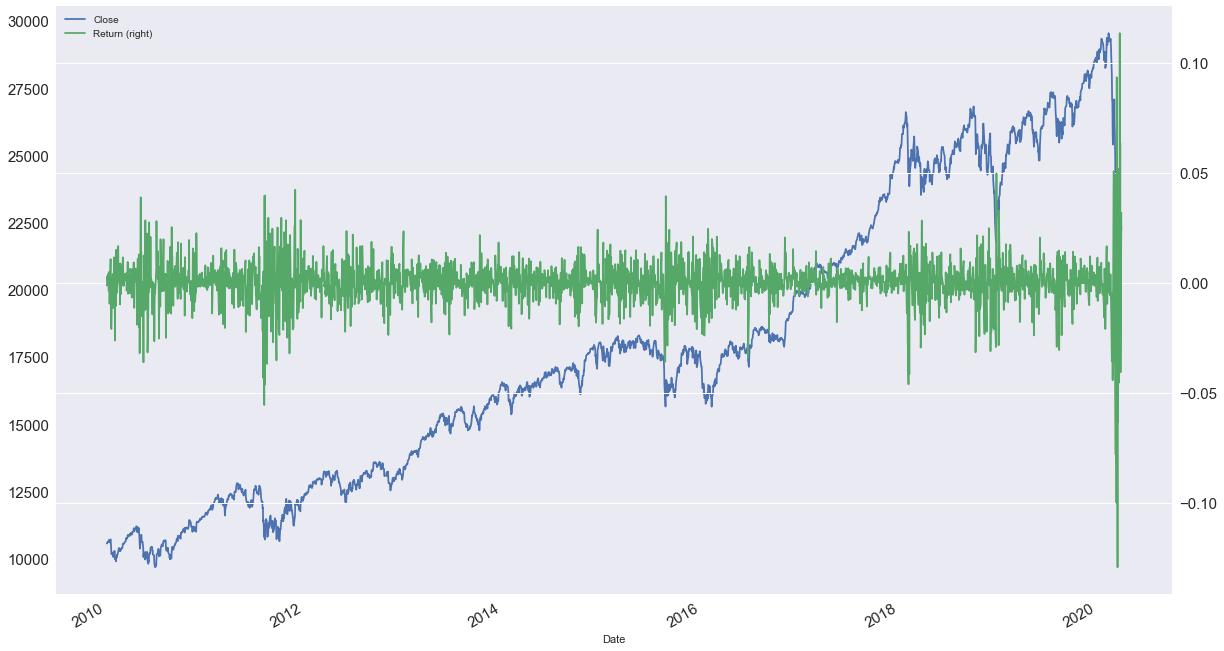

In [46]:
df.plot(figsize=(20,12),  secondary_y="Return", mark_right = True, fontsize=15) # 

In [49]:
df.rename(columns={"Close":"DJI_Close", "Return":"DJI_Return"}, inplace=True)

<AxesSubplot:xlabel='Date'>

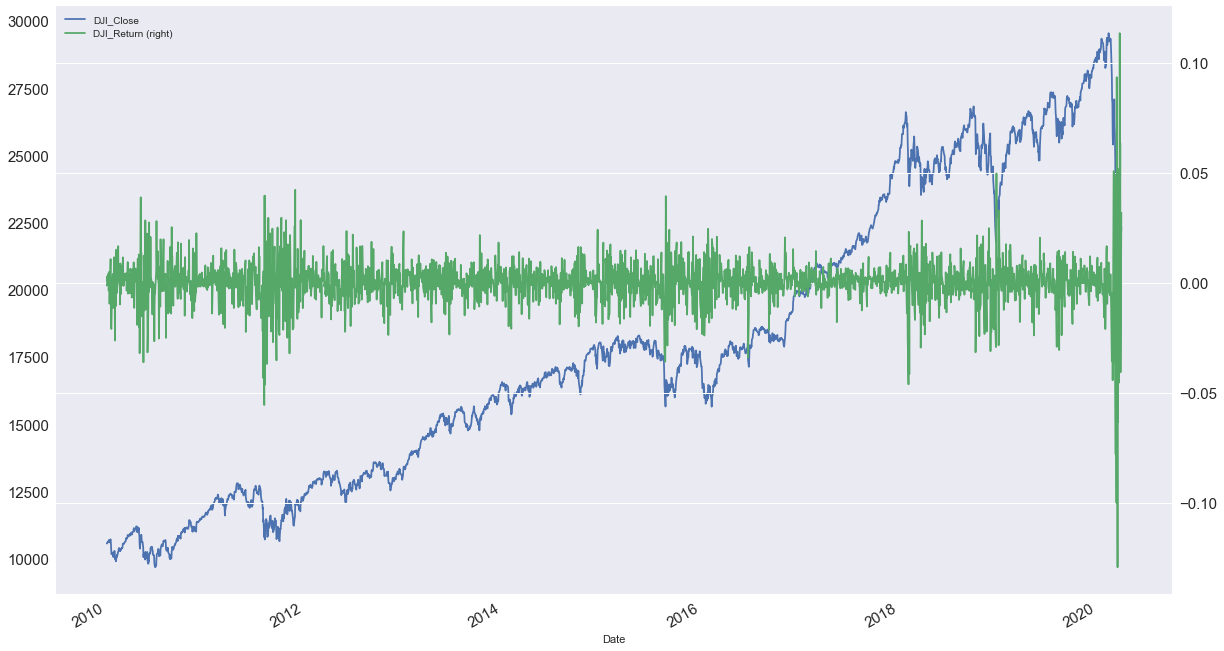

In [51]:
df.plot(figsize=(20,12),  secondary_y="DJI_Return",  mark_right = True,fontsize=15)